In [232]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [233]:
df = pd.read_csv("../datasets/50_Startups.csv")
df.shape

(50, 5)

In [234]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [235]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [236]:
df.duplicated().sum()

0

In [237]:
df.skew(numeric_only=True)

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


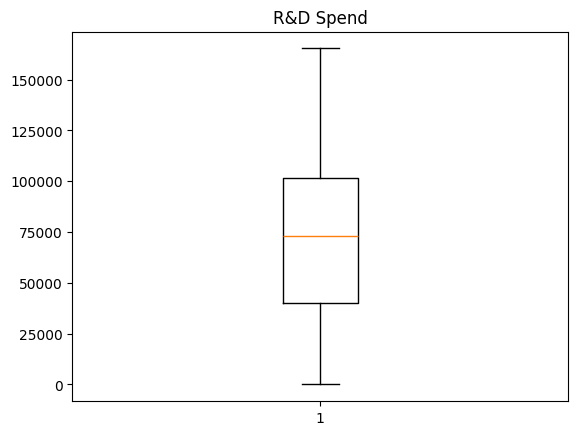

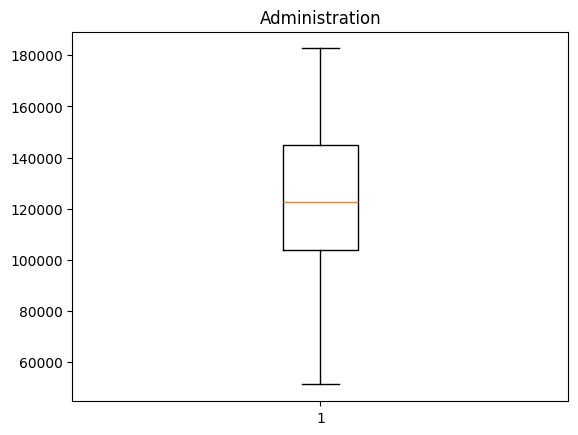

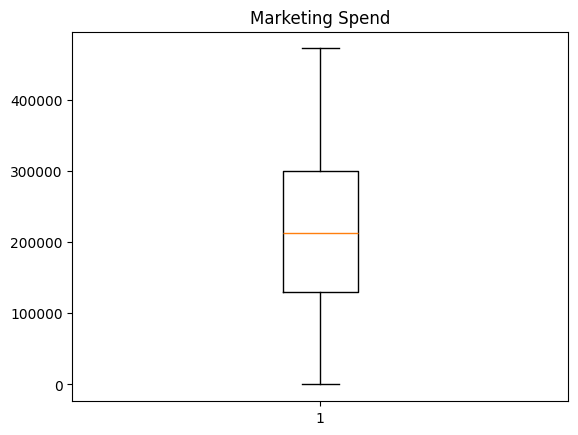

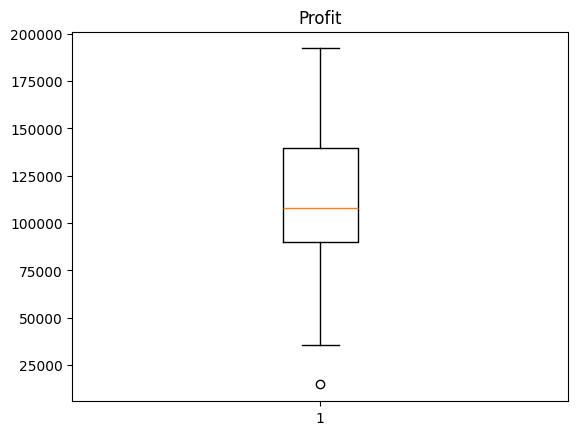

In [238]:
col_head=[]
print(df.columns)
for col in df.columns:
    if not col == "State":
        col_head.append(col)
        
col_head
for col in col_head:
    fig = plt.boxplot(df[col])
    plt.title(col)
    plt.show()
   


# Data Visualization

In [239]:
nums = col_head
cats = ['State']

In [240]:
for col in nums:
    fig= px.histogram(df,x=col,width=700)
    fig.show()

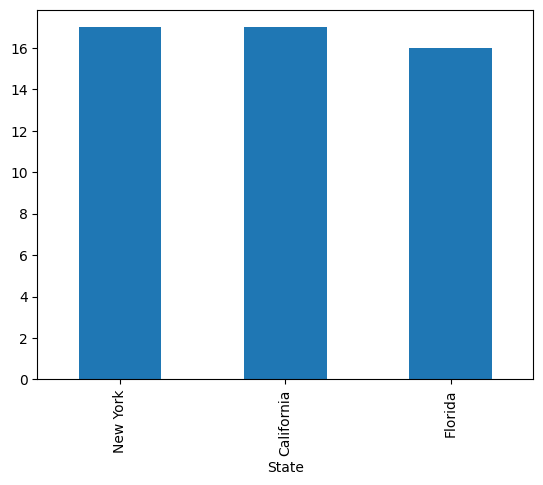

In [241]:
for col in cats:
    df[col].value_counts().plot(kind='bar')
    plt.show()

In [242]:
nums

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [243]:
for col in nums:
    fig2 = px.scatter(df,x=col,y='Profit')
    fig2.show()

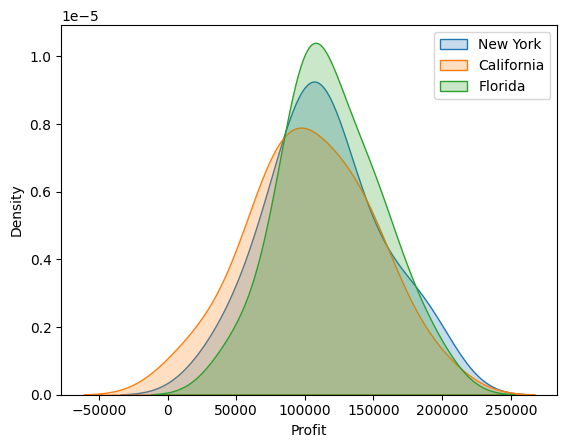

In [244]:
for col in cats:
    for category in df[col].unique():
            sn.kdeplot(df['Profit'][df[col]==category],label=category,fill=True)
    plt.legend()
    plt.show()
                       

In [245]:
nums

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [246]:
fig3=px.scatter(df,x=df['Profit'],y=df['Administration'],color=df['State'])
fig3.show()

Text(0.5, 1.0, 'Heatmap of Startups Dataset')

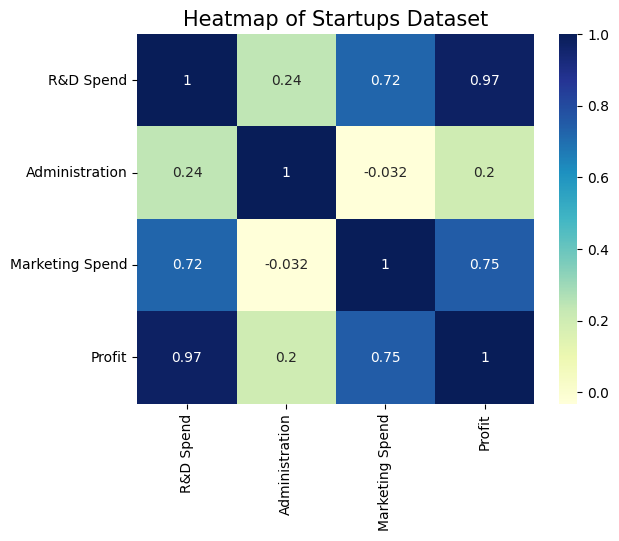

In [247]:
corr = df.corr(numeric_only=True)
ax = plt.axes()
sn.heatmap(corr, cmap = 'YlGnBu', annot= True, ax = ax)
ax.set_title("Heatmap of Startups Dataset", fontsize =15)

In [248]:
nums

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [249]:
x=df[['R&D Spend','Administration','Marketing Spend','State']]
y=df['Profit']

In [250]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [251]:
from sklearn.model_selection import train_test_split
# encoding categorical columns: Gender, smoker
 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [252]:
pipeline= ColumnTransformer([('profitpipe',OneHotEncoder(drop='first'),[3]),('scc',StandardScaler(),[0,1,2])],remainder='passthrough')
pipeline.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('profitpipe', OneHotEncoder(drop='first'),
                                 [3]),
                                ('scc', StandardScaler(), [0, 1, 2])])

In [253]:
x2 = pipeline.transform(x)
pd.DataFrame(x2,columns=pipeline.get_feature_names_out()).head()

,profitpipe__State_Florida,profitpipe__State_New York,scc__R&D Spend,scc__Administration,scc__Marketing Spend
0,0.0,1.0,2.016411,0.560753,2.153943
1,0.0,0.0,1.955860,1.082807,1.923600
2,1.0,0.0,1.754364,-0.728257,1.626528
3,0.0,1.0,1.554784,-0.096365,1.422210
4,1.0,0.0,1.504937,-1.079919,1.281528


In [254]:
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(50, 4) (40, 5) (10, 5)
(50,) (40,) (10,)


In [255]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [256]:
model.fit(xtr,ytr)
print(model.coef_,model.intercept_)

[-1618.96791462  -907.99215505 37421.00478583 -2392.11650393
  2748.17331935] 112611.43778556862


In [257]:
company = [[73994,122782,303319,'Florida']]
company = pipeline.transform(company)
model.predict(company)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([113187.95051132])

In [258]:
ypred = model.predict(xts)

In [259]:
from sklearn import metrics

In [260]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(yts, ypred)))
print('R2 Score: ', metrics.r2_score(yts, ypred))


RMSE: 9901.901955855841
R2 Score:  0.944205521080839


In [261]:
y_hat_test = pd.DataFrame(model.predict(xts))


y_hat_test
hell = pd.DataFrame(yts)
print(hell.index)
test_para = pd.DataFrame(xts)
test_para.index=hell.index



Index([12, 39, 9, 47, 31, 28, 13, 48, 45, 6], dtype='int64')


In [266]:
y_hat_test = pd.DataFrame(model.predict(xts), index=hell.index )
print(yts)
y_hat_test

12    141585.52
39     81005.76
9     149759.96
47     42559.73
31     97483.56
28    103282.38
13    134307.35
48     35673.41
45     64926.08
6     156122.51
Name: Profit, dtype: float64


,0
12,127945.432687
39,86145.079917
9,156693.623988
47,45896.075914
31,95847.173183
28,97280.793682
13,127382.431059
48,52651.795007
45,46827.321396
6,158637.109176


In [263]:
# yts["new"]=hell.index
# yts

In [264]:
# # yts["y_hat_test"] = y_hat_test
# # yts
# yts
# y_test=[]
# yts["y_hat_test"] = y_hat_test
# yts